<img src="https://raw.githubusercontent.com/sebastianVP/sebastianVP/main/toulouselautrec_logo.jpg" alt= "LOGO CAT" width=400 height=400 align = "right">

<br>
<h1><font color="#7F000E" size=5>TOULOUSE LAUTREC </font></h1>
<h1><font color="#7F000R" size=6> DATA SCIENCE MACHINE LEARNING</font></h1>
<h1><font color="#7F000E" size=4> ANALISIS DE DATOS CON PYTHON
 </font></h1>
<br>
<br>
<div style="text-align:left">
<font color="#7F000E" size=3> Ing. Alexander Valdez</font><br>
<font color="#7F000E" size=3> Curso 2271, Clases Lunes y Miercoles 20:00-22:30pm </font><br>
<font color="#7F000e" size=3> Segunda Sesión </font><br>
</div>

---

# **INDICE**


1. SUBCONJUNTO DE DATOS(FILTROS)
2. GROUPBY EN PYTHON
3. COMBINACIÓN DE DATOS(JOIN)
4. IDENTIFICAR VALORES PERDIDOS
5. MANEJANDO VALORES PERDIDOS EN PYTHON

#  NUESTRO CONJUNTO DE DATOS

Usaremos los datos de Portal Project Teaching Database. Esta sección usa el archivo surveys.csv el cual puede ser descargado desde: https://ndownloader.figshare.com/files/2292172

Vamos a estudiar la especie y el peso de los animales capturados en sitios dentro de nuestra área de estudio. El conjunto de datos esta guardado en un archivo .csv: cada línea tiene información sobre un solo animal y las columnas representan:


|Columna	|Descripción|
|---------|-----------|
|record_id|	identificador único de la observación|
|month	|mes de observación|
|day	  |día de la observación|
|year   |	año de la observación|
|plot_id|	ID de un sitio en particular|
|species_id|	código de dos letras|
|sex	|sexo del animal (“M”, “F”)|
|hindfoot_length|	tamaño de pata en mm|
|weight|	peso del animal en gramos|

**¿qué es un DataFrame?**

Un DataFrame es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos (como caractéres, enteros, valores de punto flotante, factores y más) en columnas. Es similar a una hoja de cálculo o una tabla de SQL o el data.frame de R. Un DataFrame siempre tiene un índice (con inicio en 0). El índice refiere a la posición de un elemento en la estructura de datos.

In [ ]:
import pandas as pd
# Observa que se usa pd.read_csv debido a que importamos a pandas como pd
pd.read_csv("surveys.csv")

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


Podemos ver que se leyeron 35,549 líneas. Cada una de los líneas tiene 9 columnas. La primera columna es el índice del DataFrame. El índice es usado para identificar la posición de los datos, pero no es una columna del DataFrame. Parace ser que la función read_csvde Pandas leyó el archivo correctamente. Sin embargo, no hemos salvado ningún dato en memoria por lo que no podemos trabajar con estos. Necesitamos asignar el DataFrame a una variable. Recuerda que una variable es el nombre para un valor, como xo data. Podemos crear un nuevo objeto con el nombre de la variable y le asignamos un valor usando =.

Llamemos los datos del censo importados surveys_df:

In [ ]:
surveys_df = pd.read_csv("surveys.csv")
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [ ]:
surveys_df.head() # The head() method displays the first several lines of a file. It
                  # is discussed below.

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


## EXPLORANDO LOS DATOS DEL CENSO

Una vez más podemos usar la función type para ver que cosa es surveys_df:

In [ ]:
type(surveys_df)


pandas.core.frame.DataFrame

omo podíamos esperar, es un DataFrame (o, usando el nombre completo por el cual Python usa internamente, un pandas.core.frame.DataFrame).

¿Qué tipo de cosas surveys_df contiene? Los DataFrame tienen un atributo llamado dtypes que contesta esta pregunta:

In [ ]:
surveys_df.dtypes


record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

Todos los valores de una columna tienen el mismo tipo. Por ejemplo, months tienen el tipo int64, el cual es un tipo de entero. Las celdas en la columna de mes no pueden tener valores fraccionarios, pero las columnas de weight y hindfoot_length pueden, ya que son de tupo float64. El tipo object no tiene un nombre muy útil, pero en ete caso representa una palabra (como ‘M’ y ‘F’ en el caso del sexo).

## Calculando estadísticas de los datos en un DataFrame de Pandas

In [ ]:
# Echemos un vistazo a las columnas
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

Obtengamos una lista de todas las especies. La función pd.unique nos dice los distintos valores presentes en la columnaspecies_id.

In [ ]:
surveys_df['species_id'].shape


(35549,)

In [ ]:
pd.unique(surveys_df['species_id'])


array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [ ]:
pd.unique(surveys_df['species_id']).shape

(49,)

# **1. REPASO**

En algunas ocasiones queremos calcular estadísticas de datos agrupados por subconjuntos o atributos de nuestros datos. Por ejemplo, si queremos calcular el promedio de peso de nuestros individuos por sitio.

Podemos calcular algunas estadísticas básica de todos los datos en una columna usando el siguiente comando:

In [ ]:
surveys_df['weight'].describe()


count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [ ]:
surveys_df.describe()

,record_id,month,day,year,plot_id,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000
mean,17775.000000,6.474022,16.105966,1990.475231,11.397001,29.287932,42.672428
std,10262.256696,3.396583,8.256691,7.493355,6.799406,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000
75%,26662.000000,9.000000,23.000000,1997.000000,17.000000,36.000000,48.000000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000


También podemos extraer una métrica en particular::



In [ ]:
surveys_df['weight'].min()


4.0

In [ ]:
surveys_df['weight'].max()


280.0

In [ ]:

surveys_df['weight'].mean()
surveys_df['weight'].std()
surveys_df['weight'].count()

32283

Pero si nosotros queremos extraer información por una o más variables, por ejemplo sexo, podemos usar el método .groupby de Pandas. Una vez que creamos un DataFrame groupby, podemos calcular estadísticas por el grupo de nuestra elección.

In [ ]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [ ]:
# Datos agrupados por sexo
grouped_data = surveys_df.groupby('sex')


In [ ]:
grouped_data_w=surveys_df.groupby('sex')['weight']
grouped_data_w.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,15303.0,42.170555,36.847958,4.0,20.0,34.0,46.0,274.0
M,16879.0,42.995379,36.184981,4.0,20.0,39.0,49.0,280.0


In [ ]:
grouped_data_hl=surveys_df.groupby('sex')['hindfoot_length']
grouped_data_hl.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,14894.0,28.836780,9.463789,7.0,21.0,27.0,36.0,64.0
M,16476.0,29.709578,9.629246,2.0,21.0,34.0,36.0,58.0


La función describe de Pandas regresa estadísticas descriptivas incluyendo: media, meadiana, máx, mín, std y conteos para una columna en particular de los datos. La función describe solo regresa los valores de estas estadísticas para las columnas numéricas.

In [ ]:
# Estadísticas para todas las columnas numéricas por sexo
grouped_data.describe()


record_id                                                               \
        count          mean           std  min      25%      50%       75%   
sex                                                                          
F     15690.0  18036.412046  10423.089000  3.0  8917.50  18075.5  27250.00   
M     17348.0  17754.835601  10132.203323  1.0  8969.75  17727.5  26454.25   

                month            ... hindfoot_length         weight  \
         max    count      mean  ...             75%   max    count   
sex                              ...                                  
F    35547.0  15690.0  6.583047  ...            36.0  64.0  15303.0   
M    35548.0  17348.0  6.392668  ...            36.0  58.0  16879.0   

                                                         
          mean        std  min   25%   50%   75%    max  
sex                                                      
F    42.170555  36.847958  4.0  20.0  34.0  46.0  274.0  
M    42.995379  36.184981  4.0  20.0  39.0  49.0  280.0  

[2 rows x 56 columns]

In [ ]:
# Regresa la media de cada columna numérica por sexo
grouped_data.min()

,record_id,month,day,year,plot_id,species_id,hindfoot_length,weight
sex,,,,,,,,
F,3,1,1,1977,1,BA,7.0,4.0
M,1,1,1,1977,1,AH,2.0,4.0


# Regresa la media de cada columna numérica por sexo
grouped_data.max()

In [ ]:
pd.unique(surveys_df['plot_id'])

array([ 2,  3,  7,  1,  6,  5,  8,  4, 11, 14, 15, 13,  9, 10, 17, 16, 20,
       23, 18, 21, 22, 19, 12, 24])

In [ ]:
pd.unique(surveys_df['plot_id']).shape

(24,)

In [ ]:
grouped_data2 = surveys_df.groupby(['plot_id','sex'])
grouped_data2.min()

record_id  month  day  year species_id  hindfoot_length  weight
plot_id sex                                                                 
1       F            9      1    1  1977         DM             14.0     5.0
        M            6      1    1  1977         BA             12.0     4.0
2       F            3      1    1  1977         DM             14.0     5.0
        M            1      1    1  1977         BA             13.0     5.0
3       F           17      1    1  1977         BA             11.0     4.0
        M            2      1    1  1977         BA              9.0     5.0
4       F           16      1    1  1977         DM             12.0     5.0
        M          195      1    1  1977         DM             11.0     4.0
5       F           11      1    1  1977         BA              9.0     5.0
        M           98      1    1  1977         BA             12.0     6.0
6       F           10      1    1  1977         DM             11.0     5.0
        M           92      1    1  1977         DM              8.0     6.0
7       F           71      1    1  1977         DM             12.0     6.0
        M            4      1    1  1977         DM             11.0     4.0
8       F           68      1    1  1977         DM              9.0     5.0
        M           74      1    1  1977         DM             12.0     5.0
9       F           76      1    1  1977         DM             13.0     6.0
        M           25      1    1  1977         DM             14.0     6.0
10      F           30      1    1  1977         DM             10.0     7.0
        M          201      1    1  1977         DM             12.0     4.0
11      F           20      1    1  1977         DM             11.0     5.0
        M           28      1    1  1977         DM             15.0     6.0
12      F           49      1    1  1977         DM             14.0     6.0
        M           58      1    1  1977         DM             15.0     7.0
13      F           35      1    1  1977         DM              8.0     5.0
        M           23      1    1  1977         DM             14.0     6.0
14      F           21      1    1  1977         DM             14.0     5.0
        M          124      1    1  1977         DM             11.0     5.0
15      F           22      1    1  1977         DM             12.0     4.0
        M           26      1    1  1977         DM             14.0     4.0
16      F           36      1    1  1977         DM             11.0     4.0
        M          141      1    1  1977         AH             13.0     5.0
17      F          134      1    1  1977         DM             14.0     6.0
        M           38      1    1  1977         DM             11.0     4.0
18      F           42      1    1  1977         BA             12.0     5.0
        M           47      1    1  1977         DM             11.0     7.0
19      F           84      1    1  1977         BA              7.0     6.0
        M           46      1    1  1977         BA              2.0     4.0
20      F           48      1    1  1977         BA             11.0     5.0
        M           40      1    1  1977         DM             11.0     5.0
21      F           51      1    1  1977         DM              7.0     4.0
        M           43      1    1  1977         BA             11.0     4.0
22      F          122      1    1  1977         DM             14.0     5.0
        M           45      1    1  1977         DM             13.0     6.0
23      F           41      1    1  1977         DM             14.0     8.0
        M           55      1    1  1977         DM             14.0     4.0
24      F         1963      1    1  1979         DM             12.0     6.0
        M         2063      1    1  1979         DM             12.0     4.0

# **1. SUBCONJUNTO DE DATOS FILTROS**

Los objetos DataFrame de Pandas son una herramienta fantástica para trabajar con datos. Permitiendo realizar múltiples tareas de una forma rápida y sencilla. Una de las más habituales es filtrar, poder seleccionar un subconjunto de los datos en base a los valores de uno o varias columnas. En esta entrada se explicarán diferentes formas de realizar el filtrado de DataFrame con Pandas en base a los valores de las columnas.

A modo de ejemplo en esta entrada se utilizará el conjunto de datos de exoplanetas que se puede encontrar en la librería Seaborn. Para importarlo se ha de importar la librería y utilizas la función load_dataset() como se muestra en el siguiente ejemplo

In [ ]:
import seaborn as sb
planets = sb.load_dataset('planets')# surveys_df = pd.read_csv("surveys.csv")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
type(planets)

pandas.core.frame.DataFrame

In [ ]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [ ]:
type(planets)

pandas.core.frame.DataFrame

In [ ]:
planets.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

## **1.1 Filtrado en base al valor de una columna**

La operación básica de filtrado es seleccionar aquellos valores que cumplen una condición. Para ello se puede comparar la columna con el valor deseado y obtener una lista de valores verdaderos o falsos. Por ejemplo, en el caso de los exoplanetas se pueden seleccionar aquellos que han sido descubiertos en 2008 con el siguiente código

In [ ]:
planetas_descubiertos_2008=planets['year']==2008

In [ ]:
in_2008 = planets['year'] == 2008
in_2008.head()

0    False
1     True
2    False
3    False
4    False
Name: year, dtype: bool

Para conseguir un nuevo DataFrame solamente con estos planetas simplemente se ha de usar in_2018 como filtro. Así se puede conseguir el nuevo conjunto de datos.


In [ ]:
planets_2008 = planets[in_2008]
planets_2008.head()

,method,number,orbital_period,mass,distance,year
1,Radial Velocity,1,874.774,2.21,56.95,2008
5,Radial Velocity,1,185.840,4.80,76.39,2008
8,Radial Velocity,1,993.300,10.30,73.10,2008
12,Radial Velocity,1,479.100,3.88,97.28,2008
27,Radial Velocity,1,952.700,5.30,97.18,2008


In [ ]:
planets_2008.describe()

,number,orbital_period,mass,distance,year
count,74.000000,69.000000,43.000000,64.000000,74.0
mean,1.621622,9394.701194,3.424339,98.680312,2008.0
std,1.178607,43792.275764,4.934787,115.811291,0.0
min,1.000000,1.091423,0.012600,4.940000,2008.0
25%,1.000000,4.954658,0.268905,33.630000,2008.0
50%,1.000000,226.930000,1.990000,56.070000,2008.0
75%,2.000000,1260.000000,4.910000,123.955000,2008.0
max,6.000000,318280.000000,25.000000,680.000000,2008.0


No es necesario guardar el filtro en una variable, simplemente se puede utilizar la operación directamente como filtro.

In [ ]:
planets_2008 = planets[planets['year'] == 2008]
planets_2008

,method,number,orbital_period,mass,distance,year
1,Radial Velocity,1,874.774000,2.21,56.95,2008
5,Radial Velocity,1,185.840000,4.80,76.39,2008
8,Radial Velocity,1,993.300000,10.30,73.10,2008
12,Radial Velocity,1,479.100000,3.88,97.28,2008
27,Radial Velocity,1,952.700000,5.30,97.18,2008
...,...,...,...,...,...,...
968,Transit,1,3.722475,NaN,121.70,2008
969,Transit,1,1.091423,NaN,NaN,2008
971,Transit,1,2.243752,NaN,160.00,2008
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
planets_2008.describe()

,number,orbital_period,mass,distance,year
count,74.000000,69.000000,43.000000,64.000000,74.0
mean,1.621622,9394.701194,3.424339,98.680312,2008.0
std,1.178607,43792.275764,4.934787,115.811291,0.0
min,1.000000,1.091423,0.012600,4.940000,2008.0
25%,1.000000,4.954658,0.268905,33.630000,2008.0
50%,1.000000,226.930000,1.990000,56.070000,2008.0
75%,2.000000,1260.000000,4.910000,123.955000,2008.0
max,6.000000,318280.000000,25.000000,680.000000,2008.0


## **1.2 Filtrado de las columnas que no tienen un valor**


De forma análoga a como se ha conseguido seleccionar los registros que cumplen una condición se puede seleccionar aquellos que no la cumple. Ahora simplemente el filtro se puede conseguir mediante el operador no igual. Así los planetas que no han sido descubiertos en 2008 se pueden obtener con el siguiente código.

In [ ]:
planets_not_2008 = planets[planets['year'] != 2008]
planets_not_2008.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30,7.10,77.40,2006
2,Radial Velocity,1,763.00,2.60,19.84,2011
3,Radial Velocity,1,326.03,19.40,110.62,2007
4,Radial Velocity,1,516.22,10.50,119.47,2009
6,Radial Velocity,1,1773.40,4.64,18.15,2002


In [ ]:
planets_not_2008.describe()

,number,orbital_period,mass,distance,year
count,961.000000,923.000000,470.000000,744.000000,961.000000
mean,1.798127,1450.335724,2.566234,278.296290,2009.152966
std,1.245340,24115.939062,3.698124,761.616069,4.111279
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.497511,0.229250,32.317500,2007.000000
50%,1.000000,36.855000,1.260000,55.205000,2011.000000
75%,2.000000,479.750000,2.867500,200.000000,2012.000000
max,7.000000,730000.000000,21.420000,8500.000000,2014.000000


## **1.3 Filtrado en base a valores nulos**

En muchos conjuntos de datos es habitual que existan registros con valores nulos. Para identificar los registros nulos objetos de Pandas cuentan con los métodos isnull() y notnull(). Tal como indica el nombre, el primero de ellos devuelve verdadero en los registros nulos y el segundo en los que no son nulos. Aplicando estos métodos a una columna se puede saber los registros que cumplen una condición u otra. En el ejemplo de los exoplanetas se puede filtrar aquellos en los que no se conoce la masa con el siguiente ejemplo.

In [ ]:
planets['mass']

0        7.10
1        2.21
2        2.60
3       19.40
4       10.50
        ...  
1030      NaN
1031      NaN
1032      NaN
1033      NaN
1034      NaN
Name: mass, Length: 1035, dtype: float64

In [ ]:
planets.mass.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1030     True
1031     True
1032     True
1033     True
1034     True
Name: mass, Length: 1035, dtype: bool

In [ ]:
planets_null = planets[planets.mass.isnull()]
planets_null.head()

,method,number,orbital_period,mass,distance,year
7,Radial Velocity,1,798.50000,NaN,21.41,1996
20,Radial Velocity,5,0.73654,NaN,12.53,2011
25,Radial Velocity,1,116.68840,NaN,18.11,1996
26,Radial Velocity,1,691.90000,NaN,81.50,2012
29,Imaging,1,NaN,NaN,45.52,2005


In [ ]:
planets_null.describe()

,number,orbital_period,mass,distance,year
count,522.000000,479.000000,0.0,310.000000,522.000000
mean,1.852490,3237.472696,NaN,604.638742,2010.660920
std,1.309673,37385.453883,NaN,1100.621316,3.040666
min,1.000000,0.090706,NaN,7.690000,1992.000000
25%,1.000000,3.358123,NaN,120.425000,2010.000000
50%,1.000000,7.877357,NaN,290.000000,2011.000000
75%,2.000000,33.303670,NaN,613.000000,2013.000000
max,7.000000,730000.000000,NaN,8500.000000,2014.000000


Por otro lado, para obtener aquellos en los que se conoce la masa se puede utilizar.



In [ ]:
planets_not_null = planets[planets.mass.notnull()]
planets_not_null.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
planets_not_null.describe()

,number,orbital_period,mass,distance,year
count,513.000000,513.000000,513.000000,498.000000,513.000000
mean,1.717349,850.184862,2.638161,52.068213,2007.452242
std,1.164259,1515.656126,3.818617,46.596041,4.154506
min,1.000000,1.328300,0.003600,1.350000,1989.000000
25%,1.000000,39.845000,0.229000,24.497500,2005.000000
50%,1.000000,360.200000,1.260000,39.940000,2009.000000
75%,2.000000,990.000000,3.040000,59.332500,2011.000000
max,6.000000,17337.500000,25.000000,354.000000,2014.000000


## **1.4 Filtrado por elementos de una lista**

Los filtros anteriores bastante útiles, pero en muchas ocasiones se desea seleccionar datos cuyos valores se encuentra en una lista. Para ello se puede aplicar el método isin() a las columnas para obtener un filtro. Por ejemplo, los planetas que han sido descubiertos en 2008 y 2008 son:

In [ ]:
planets_in_years = planets[planets.year.isin([2008, 2009])]
planets_in_years.head()

,method,number,orbital_period,mass,distance,year
1,Radial Velocity,1,874.774,2.21,56.95,2008
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
8,Radial Velocity,1,993.300,10.30,73.10,2008
11,Radial Velocity,1,335.100,9.88,39.43,2009


Por otro lado, si se desea conocer los registros que no está en una lista mediante el operador negación ~ se puede invertir el filtro. Así los planetas que no han sido descubiertos en 2008 y 2009 son:

In [ ]:
planets_not_in_years = planets[~planets.year.isin([2008, 2009])]
planets_not_in_years.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30,7.10,77.40,2006
2,Radial Velocity,1,763.00,2.60,19.84,2011
3,Radial Velocity,1,326.03,19.40,110.62,2007
6,Radial Velocity,1,1773.40,4.64,18.15,2002
7,Radial Velocity,1,798.50,NaN,21.41,1996


## **1.5 Segmentando subconjuntos de filas y columnas en Python**

Podemos seleccionar subconjuntos de datos, contenidos en rangos específicos de filas y columnas, usando etiquetas o indexación basada en números enteros.

loc es usado principalmente para indexación basada en etiquetas. Permite usar números enteros pero son interpretados como una etiqueta.
iloc es usado para indexación basada en números enteros

In [ ]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
planets.iloc[0:3, 1:4]


,number,orbital_period,mass
0,1,269.300,7.10
1,1,874.774,2.21
2,1,763.000,2.60


In [ ]:
# Selecciona todas las columnas para las filas con índices entre 0 y 10
planets.iloc[[0, 10], :]

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.3,7.10,77.40,2006
10,Radial Velocity,2,883.0,0.86,74.79,2010


In [ ]:
# ¿Qué salida produce el la siguiente instrucción?
planets.loc[0, ['number', 'orbital_period', 'mass']]

number                1
orbital_period    269.3
mass                7.1
Name: 0, dtype: object

In [ ]:
# ¿Qué pasa cuando ejecutas el siguiente código?
planets.loc[[0, 10, 359], :]

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.10,77.40,2006
10,Radial Velocity,2,883.00000,0.86,74.79,2010
359,Radial Velocity,1,2.54858,1.87,36.52,2003


# **2. GROUPBY EN PYTHON**

In [ ]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


Creando estadísticas de conteos rapidamente con Pandas

In [ ]:
grouped_data_s =surveys_df.groupby('species_id')
grouped_data_s['record_id'].describe()

,count,mean,std,min,25%,50%,75%,max
species_id,,,,,,,,
AB,303.0,13201.702970,5835.874869,3126.0,7604.00,13829.0,16981.50,33713.0
AH,437.0,21631.716247,7194.381201,1446.0,15507.00,21600.0,27462.00,35546.0
AS,2.0,19760.000000,1170.968830,18932.0,19346.00,19760.0,20174.00,20588.0
BA,46.0,18586.043478,921.349203,16598.0,17972.50,18803.0,19270.50,19775.0
CB,50.0,18300.460000,7271.702586,3189.0,13227.00,19590.5,21784.75,33109.0
CM,13.0,4055.000000,2789.266660,3190.0,3263.00,3291.0,3319.00,13337.0
CQ,16.0,5718.062500,1899.301607,3200.0,3720.75,6199.0,6371.50,9364.0
CS,1.0,15878.000000,NaN,15878.0,15878.00,15878.0,15878.00,15878.0
CT,1.0,28988.000000,NaN,28988.0,28988.00,28988.0,28988.00,28988.0


In [ ]:
# Cuenta el número de muestras por especieMMMMMM
species_counts = surveys_df.groupby('species_id')['record_id'].count()
print(species_counts)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64


O, también podemos contar las líneas que tienen la especie “DO”:

In [ ]:
surveys_df.groupby('species_id')['record_id'].count()['DO']


3027

# **3. COMBINACIÓN DE DATOS(JOIN)**

## **3.1 CONCATENACION**

La funcion concat(),concatena una cantidad arbitraria de Seriesobjetos DataFramea lo largo de un eje mientras realiza una lógica de conjunto opcional (unión o intersección) de los índices en los otros ejes

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.DataFrame({
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

In [ ]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [ ]:
df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

In [ ]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [ ]:
df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)


In [ ]:
frames = [df1, df2, df3]

In [ ]:
frames

[    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
     A   B   C   D
 4  A4  B4  C4  D4
 5  A5  B5  C5  D5
 6  A6  B6  C6  D6
 7  A7  B7  C7  D7,
       A    B    C    D
 8    A8   B8   C8   D8
 9    A9   B9   C9   D9
 10  A10  B10  C10  D10
 11  A11  B11  C11  D11]

In [ ]:
result = pd.concat(frames)

In [ ]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


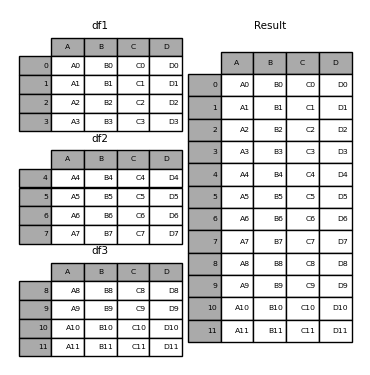


```
frames = [process_your_file(f) for f in files]

result = pd.concat(frames)
```





## **3.2 Lógica de unión del eje resultante**


La palabra clave  join especifica cómo manejar los valores del eje que no existen en el primero DataFrame.

In [ ]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)

In [ ]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [ ]:
df1 = pd.DataFrame({
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

In [ ]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [ ]:
result = pd.concat([df1, df4], axis=1)

In [ ]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


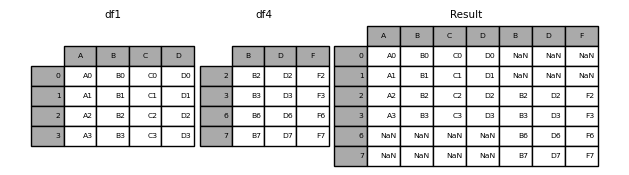

---

join='inner'toma la intersección de los valores del eje


In [ ]:
result = pd.concat([df1, df4], axis=1, join="inner")


In [ ]:
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


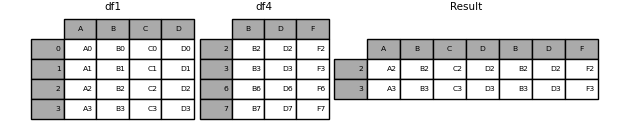

---

Para realizar una unión "izquierda" efectiva utilizando el índice exacto del original DataFrame, el resultado se puede volver a indexar.

In [ ]:
result = pd.concat([df1, df4], axis=1).reindex(df1.index)

result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


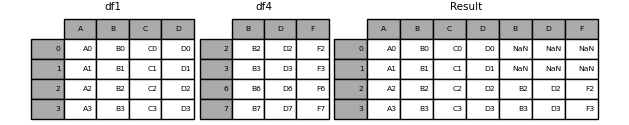

---

## Ignorando índices en el eje de concatenación


Para DataFramelos objetos que no tienen un índice significativo, ignore_index ignora los índices superpuestos.

In [ ]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [ ]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [ ]:
result = pd.concat([df1, df4], ignore_index=True, sort=False)

result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


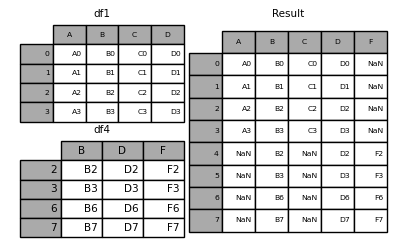

---

## **3.3 Concatenando Series y Dataframe juntos**

Puede concatenar una combinación de Seriesy DataFrameobjetos.

In [ ]:
s1 = pd.Series(["X0", "X1", "X2", "X3"], name="X")

result = pd.concat([df1, s1], axis=1)

result

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


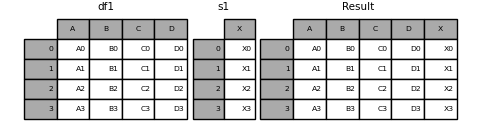

Los sin nombre Seriesse numerarán consecutivamente.



In [ ]:
s2 = pd.Series(["_0", "_1", "_2", "_3"])

result = pd.concat([df1, s2, s2, s2], axis=1)

result

,A,B,C,D,0,1,2
0,A0,B0,C0,D0,_0,_0,_0
1,A1,B1,C1,D1,_1,_1,_1
2,A2,B2,C2,D2,_2,_2,_2
3,A3,B3,C3,D3,_3,_3,_3


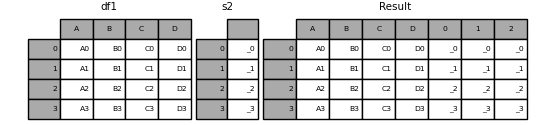

ignore_index=Trueeliminará todas las referencias de nombres.



In [ ]:
result = pd.concat([df1, s1], axis=1, ignore_index=True)

result

,0,1,2,3,4
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


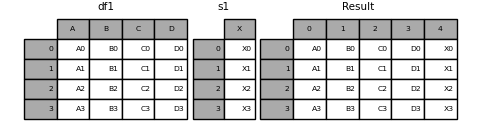

## **3.4 MERGE**

merge()Realiza operaciones de unión similares a bases de datos relacionales como SQL. Los usuarios que estén familiarizados con SQL pero que sean nuevos en Pandas pueden hacer referencia a una comparación con SQL .

###Tipos de fusión
merge()Implementa operaciones comunes de unión de estilo SQL.

* uno a uno : unir dos DataFrameobjetos en sus índices que deben contener valores únicos.

* muchos a uno : unir un índice único a una o más columnas en un archivo DataFrame.

* muchos a muchos : unir columnas sobre columnas.

In [ ]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

In [ ]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [ ]:
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [ ]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [ ]:
result = pd.merge(left, right, on="key")


In [ ]:
result

,0,1,2,3,4
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


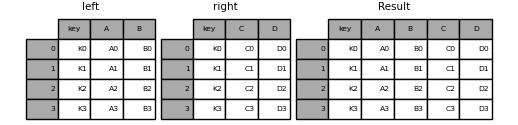

El how argumento to merge()especifica qué claves se incluyen en la tabla resultante. Si una combinación de teclas no aparece en las tablas izquierda o derecha, los valores en la tabla unida serán NA. A continuación se muestra un resumen de las howopciones y sus nombres equivalentes en SQL:

In [ ]:
left = pd.DataFrame(
   {
      "key1": ["K0", "K0", "K1", "K2"],
      "key2": ["K0", "K1", "K0", "K1"],
      "A": ["A0", "A1", "A2", "A3"],
      "B": ["B0", "B1", "B2", "B3"],
   }
)


right = pd.DataFrame(
   {
      "key1": ["K0", "K1", "K1", "K2"],
      "key2": ["K0", "K0", "K0", "K0"],
      "C": ["C0", "C1", "C2", "C3"],
      "D": ["D0", "D1", "D2", "D3"],
   }
)


result = pd.merge(left, right, how="left", on=["key1", "key2"])# revision de DOBLE KEY EN EL CASO DE MERGE

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [ ]:
left = pd.DataFrame(
   {
      "key1": ["K0", "K0", "K1", "K2"],
      "key2": ["K0", "K1", "K0", "K1"],
      "A": ["A0", "A1", "A2", "A3"],
      "B": ["B0", "B1", "B2", "B3"],
   }
)

In [ ]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [ ]:
right = pd.DataFrame(
   {
      "key1": ["K0", "K1", "K1", "K2"],
      "key2": ["K0", "K0", "K0", "K0"],
      "C": ["C0", "C1", "C2", "C3"],
      "D": ["D0", "D1", "D2", "D3"],
   }
)

In [ ]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [ ]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])


In [ ]:
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


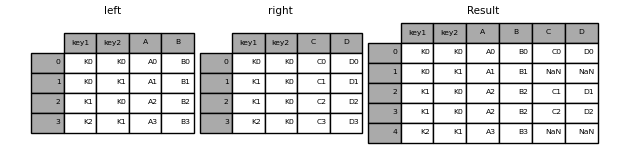

---

## **3.5 DATAFrame.join()**

DataFrame.join()combina las columnas de múltiples, potencialmente indexadas de manera diferente, DataFrameen un solo resultado DataFrame.

In [ ]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)


right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)


result = left.join(right)

result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


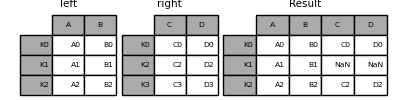

In [ ]:
result = left.join(right, how="outer")

result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


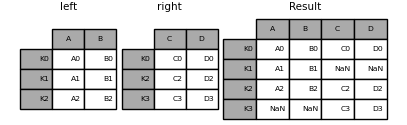

# **4. IDENTIFICAR VALORES PERDIDOS**

El conjunto de datos
Para este seccion vamos a trabajar con el conjunto de datos público Automobile, que se encuentra en el repositorio [UCI Machine Learning](https://archive.ics.uci.edu/). Éste dataset contiene 205 instancias con diferentes características de automóviles como el número de puertas (number-of-doors), los caballos (horsepower) o el precio (price). Para cargar el dataset en Python hacemos uso de la función read_csv de la librería Pandas, a la que le pasamos la ruta donde se alojan los datos y nos devuelve un objeto DataFrame. Una vez tenemos nuestro DataFrame, le asignamos el nombre de cada variable como podéis ver en el siguiente código:

In [ ]:
import pandas as pd

# Cargamos el dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning'
                 '-databases/autos/imports-85.data', encoding = 'utf-8',
                 header = None)

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning'
                 '-databases/autos/imports-85.data', encoding = 'utf-8')

In [ ]:
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
df2=  pd.read_csv("imports-85.data",header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
df2

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
# Añadimos el nombre de cada variable
df.columns = ["symboling", "normalized-losses", "make", "fuel-type",
              "aspiration", "num-of-doors", "body-style",
              "drive-wheels", "engine-location", "wheel-base", "length",
              "width", "height", "curb-weight", "engine-type",
              "num-of-cylinders", "engine-size", "fuel-system", "bore",
              "stroke", "compression-ratio", "horsepower", "peak-rpm",
              "city-mpg", "highway-mpg", "price"]

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
import pandas as pd

na_values = ["?"]

# Cargamos el dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning'
                 '-databases/autos/imports-85.data', encoding = 'utf-8',
                 na_values = na_values, header = None)

# Añadimos el nombre de cada variable
df.columns = ["symboling", "normalized-losses", "make", "fuel-type",
              "aspiration", "num-of-doors", "body-style",
              "drive-wheels", "engine-location", "wheel-base", "length",
              "width", "height", "curb-weight", "engine-type",
              "num-of-cylinders", "engine-size", "fuel-system", "bore",
              "stroke", "compression-ratio", "horsepower", "peak-rpm",
              "city-mpg", "highway-mpg", "price"]

In [ ]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


También existe una función replace que podemos usar para reemplazar un valor por otro sin tener que cargar el dataset de nuevo. El siguiente paso consiste en conocer el número de missing values que hay en cada variable. La manera más sencilla para ello consiste en usar función isnull de Pandas, que devuelve True cuando se trata de un valor perdido y False en caso contrario, junto con la función sum para saber cuántos valores perdidos hay en cada columna. Veamos como funciona en el siguiente código:

In [ ]:
# Identificamos el número de missing values en cada columna
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Podemos observar que la variable normalized-losses tiene 41 valores perdidos. bore, stroke y price cuentan con 4 missing values. Finalmente num-of-doors, horsepower y peak-rpm tienen solo 2 valores perdidos. Otra forma de visualizar los missing values en un gráfico es utilizar los mapas de calor que nos proporciona la librería seaborn como podéis ver a continuación:

<Axes: >

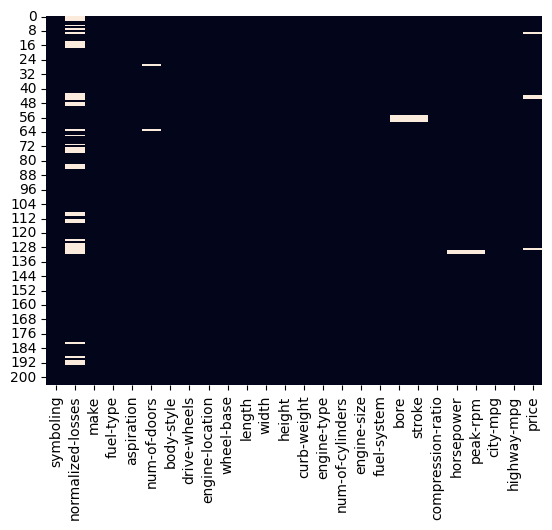

In [ ]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(df.isnull(), cbar=False)

Las marcas blancas del anterior gráfico representan los valores perdidos. Mediante este gráfico es más fácil encontrar patrones y vínculos existentes entre los missing values en las diferentes variables.

Una vez sabemos los valores perdidos que hay en las variables y están identificadas correctamente en el Dataframe, es hora de ocuparnos de ellos mediante su eliminación o imputación.

# **5. MANEJANDO VALORES PERDIDOS EN PYTHON**

En primer lugar explicaremos como eliminar estos valores perdidos en Python. Esta opción no es recomendable para conjuntos de datos pequeños o con un alto porcentaje de valores perdidos. Dicho esto y si estamos seguros de que queremos eliminar estos valores, tan solo tenemos que usar la función dropna que nos proporciona Pandas.

Así, podemos, por ejemplo, eliminar las observaciones que contengan valores perdidos en todas las columnas ajustando el argumento how a 'all' (how='all') o mantener sólo aquellas con al menos 3 valores que no sean missing values (thresh=3). Para este caso, le vamos a definir en qué columnas buscar los valores perdidos y para ello usamos el parámetro subset:

In [ ]:
# Eliminamos las filas con missing values en horsepower o peak-rpm
df.dropna(subset=['horsepower', 'peak-rpm'], inplace=True)
#df.dropna(['horsepower', 'peak-rpm'], inplace=True)

In [ ]:
# Comprobamos que se han eliminado
print("valores perdidos en horsepower: " +
      str(df['horsepower'].isnull().sum()))
print("valores perdidos en peak-rpm: " +
      str(df['peak-rpm'].isnull().sum()))

valores perdidos en horsepower: 0
valores perdidos en peak-rpm: 0


## 5.1 Imputación de los valores perdidos


Hay dos aproximaciones comúnmente usadas para la imputación de los valores perdidos.

La primera técnica consiste en rellenar estos valores con la media (o mediana) de los datos de la variable en el caso de que se trate de una variable numérica. Para el caso de las variables categóricas imputamos los valores perdidos con la moda de la variable.

De nuevo Pandas nos ofrece una función (fillna) para realizar esta imputación de manera sencilla. A continuación podéis ver como imputamos la variable numérica bore con la media y la variable categórica num-of-doors con el valor mas frecuente:

In [ ]:
df['bore'].describe()

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

In [ ]:
df['bore'].mean()

3.3284422110552763

In [ ]:
df['num-of-doors']

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 203, dtype: object

In [ ]:
df['num-of-doors'].mode()[0]

'four'

In [ ]:
# Imputamos la variable bore con la media
df['bore'].fillna(df['bore'].mean(), inplace=True)
print("valores perdidos en bore: " +
      str(df['bore'].isnull().sum()))

# Imputamos la variable num-of-doors con la moda
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)
print("Valores perdidos en num-of-doors: " +
      str(df['num-of-doors'].isnull().sum()))

valores perdidos en bore: 0
Valores perdidos en num-of-doors: 0


Para este ejemplo práctico hemos calculado la media/moda de todos los datos. Sin embargo, en un ejemplo real y para evitar la fuga de datos (data leakage en inglés), es importante dividir los datos en datos de entrenamiento y datos de test, calcular la media/moda únicamente de los datos de entrenamiento y aplicarla a los datos de prueba.

Otra técnica más avanzada consiste en el uso de modelos predictivos para estimar los valores perdidos. Un modelo no paramétrico muy popular para estos casos es el k-nearest neighbors, donde se estima el valor perdido como la media (en el caso de las variables numéricas) de los valores de los k vecinos u observaciones mas cercanos. Asimismo, para las variables categóricas, se utiliza las clase mayoritaria de entre los k mas cercanos.

La librería scikit-learn nos proporciona la clase KNNImputer para hacer uso de este modelo en la imputación de missing values. Esta clase usa por defecto la distancia euclidiana, pero podemos elegir la que prefiramos modificando el parámetro metric. Asimismo, también podemos elegir el número de vecinos con el argumento n_neighbors y en esta ocasión usaremos 5. Podeís ver en el siguiente código como utilizamos este método para imputar los valores perdidos en la variable normalized-losses:

In [ ]:
from sklearn.impute import KNNImputer

# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Ajustamos el modelo e imputamos los missing values
imputer.fit(df[["normalized-losses"]])
df["normalized-losses"] = imputer.transform(df[["normalized-losses"]]).ravel()

print("Valores perdidos en normalized-losses: " +
      str(df['normalized-losses'].isnull().sum()))

Valores perdidos en normalized-losses: 0


In [ ]:
df['normalized-losses'].isnull().sum()

0

De nuevo recordamos que, aunque para esta sección hemos entrenado el modelo con todos los datos, en un problema real es recomendable hacerlo solo con los del conjunto de entrenamiento.